In [25]:
# Data - 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# Source: https://github.com/CSSEGISandData/COVID-19 

This notebook is used to generate the following viz:
* World Infection Map;
* World Rankings;
* Confirmed, Deaths, Recovered, and Actives Timeseries;
* World, South Korea, and Italy Timelines;

In [26]:
# Data From https://www.kaggle.com/imdevskp/corona-virus-report
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import moviepy.editor as mp
from IPython.display import Video
import imageio

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[~world.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]
#PATH = "C:/py/covid19/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

file = '04-22-2020.csv'
today = '04-22-2020'
today = pd.to_datetime(today, format = "%m-%d-%Y")
df = pd.read_csv(path+file)
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-22 23:30:53,34.223334,-82.461707,22,0,0,22,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-22 23:30:53,30.295065,-92.414197,117,7,0,110,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-22 23:30:53,37.767072,-75.632346,59,1,0,58,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-22 23:30:53,43.452658,-116.241552,622,12,0,610,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-22 23:30:53,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [27]:
from methods import plot_rank, plot_day, plot_map, build_gif, get_rank
from methods import build_df, get_range, plot_contry, plot_contry_d
from methods import plot_contry_d_two, plot_contry_r, plot_contry_a

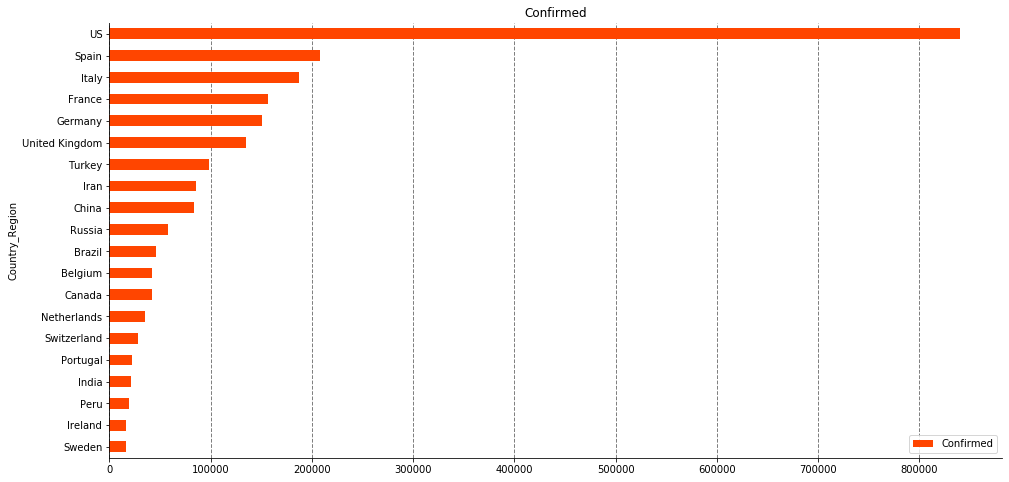

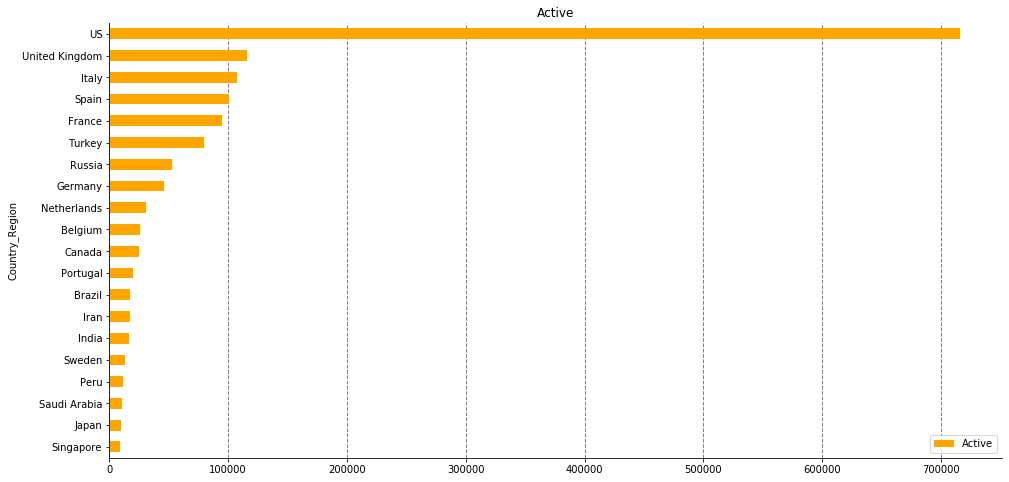

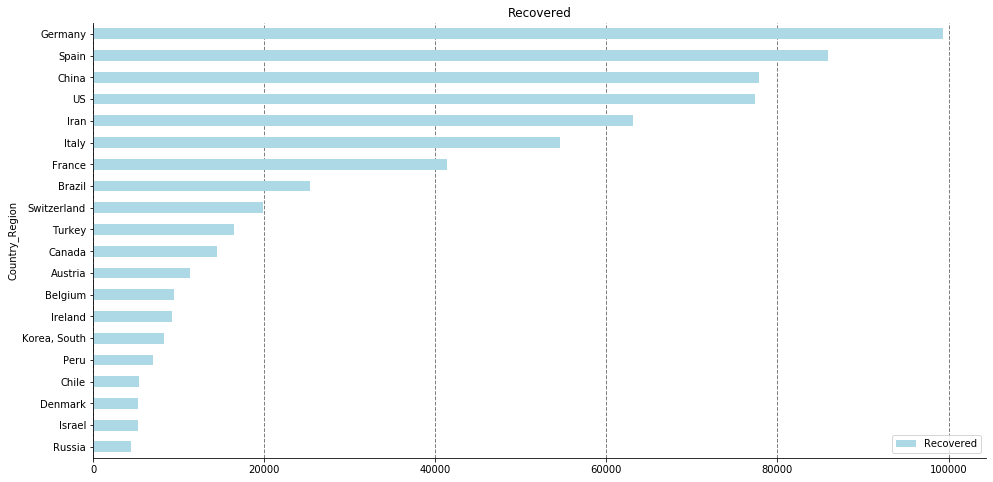

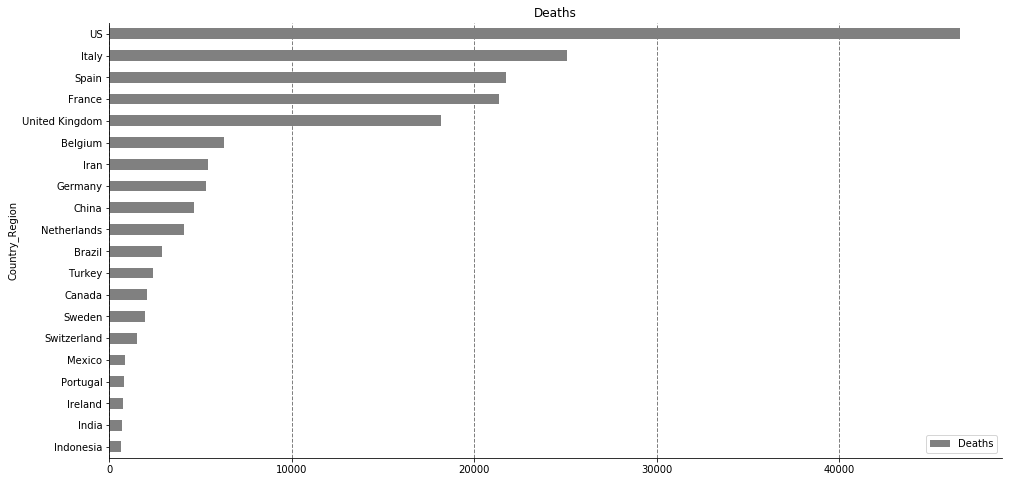

In [28]:
plot_rank('Confirmed', 20, 'orangered')
plot_rank('Active', 20, 'orange')
plot_rank('Recovered', 20, 'lightblue')
plot_rank('Deaths', 20, 'grey')

# TIMESERIES

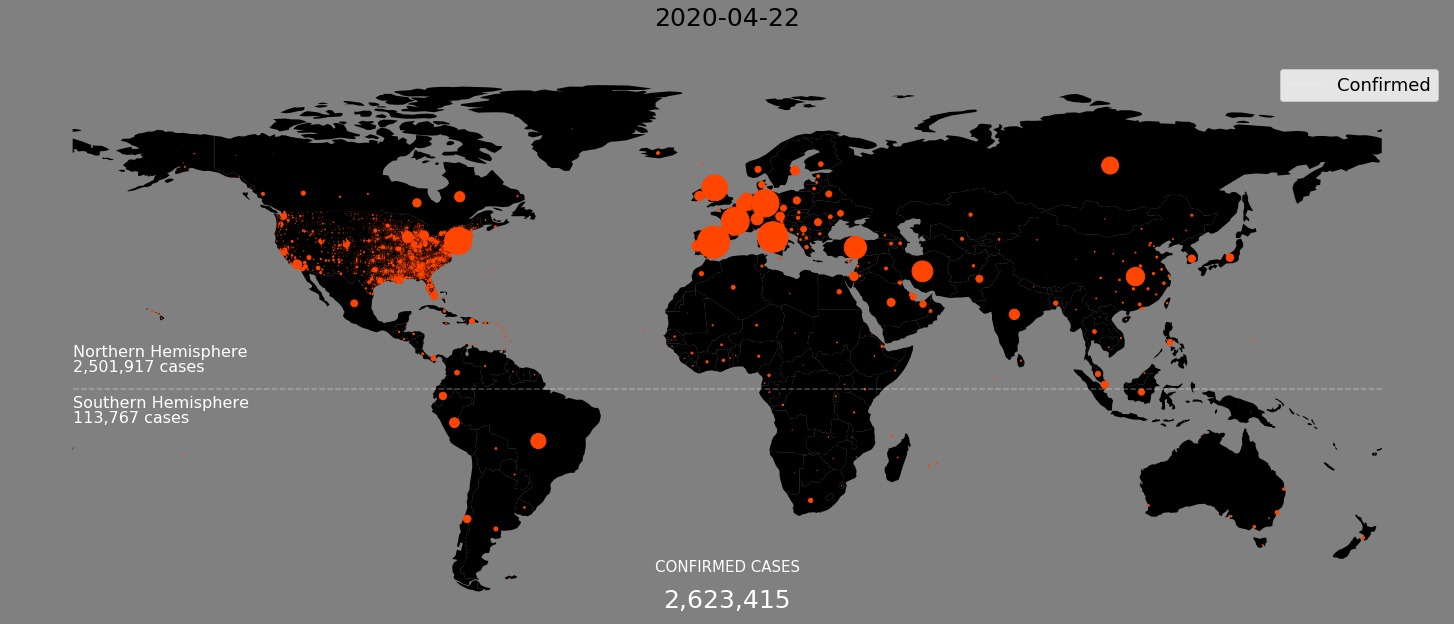

In [29]:
plot_map(df, today)    

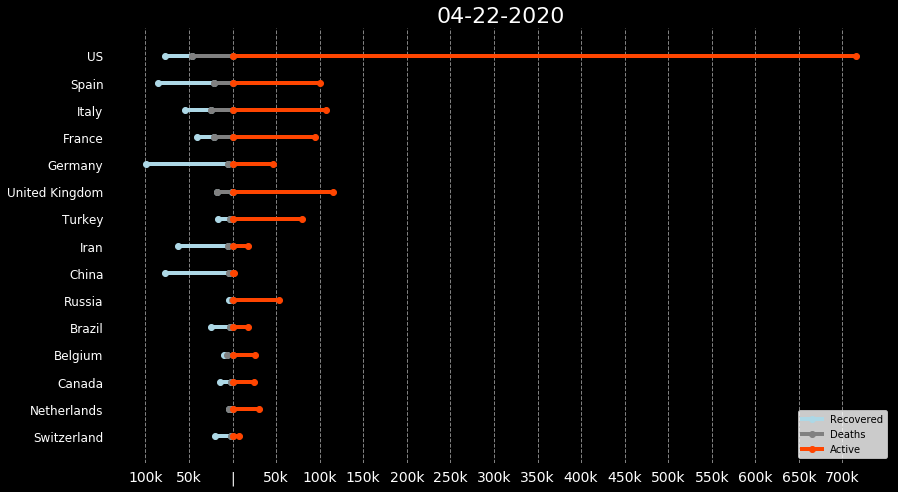

In [30]:
get_rank()

## Map Timeseries

In [31]:
# create file name range from 03-01-2020 **First update with lat and long
dates = pd.date_range(start="03-01-2020",end=today)
files = []

# create a list of datasets filenames
for i in dates.strftime('%m-%d-%Y'):
    files.append(str(i)+'.csv')
    
# create maps
for file in files:
    plot_map(pd.read_csv(path+file), file[:10])
    plt.close('all')
    if(files[-1] == file): print('Concluded')
        
# Build files list
break_size = int( len( files) / 4)
clip_list = []

# use break size to define how many times to repeat the images in each break.
# This gives us some control on how fast the imgs transition in each part of the video/.gif
for i, file in enumerate(files):
    
    filename = 'img/video/'+file[:10]+'_map.png'
    
    if(i == len(files)-1):
        clip_list.extend([filename for i in range(15)])
    elif(i > break_size*3):
        clip_list.extend([filename for i in range(3)])
    elif(i > break_size*2):
        clip_list.extend([filename for i in range(2)])
    else:
        clip_list.append(filename)

# build map video       
clip = mp.ImageSequenceClip(clip_list, fps=3)
clip.write_videofile("img/video/map_timeseries.mp4")

# build gif
build_gif(clip_list, 'img/video/map_timeseries', duration=0.3)

Concluded
Moviepy - Building video img/video/map_timeseries.mp4.
Moviepy - Writing video img/video/map_timeseries.mp4



Moviepy - Done !
Moviepy - video ready img/video/map_timeseries.mp4
Building .gif...
writing .gif...
concluded


## Rank Timeseries

In [32]:
# create file name range from 03-01-2020 **First update with lat and long
dates = pd.date_range(start="02-01-2020",end=today)

# create a list of datasets filenames
files = []
for i in dates.strftime('%m-%d-%Y'):
    files.append(str(i)+'.csv')

# create maps
for file in files:
    plot_day(pd.read_csv(path+file), file[:10])
    plt.close('all')

# Build files list
break_size = int( len( files) / 4)
clip_list = []

# use break size to define how many times to repeat the images in each break.
# This gives us some control on how fast the imgs transition in each part of the video/.gif
for i, file in enumerate(files):
    filename = 'img/video/'+file[:10]+'.png'
    # define
    if(i == len(files)-1):
        clip_list.extend([filename for i in range(15)])
    elif(i > break_size*3):
        clip_list.extend([filename for i in range(3)])
    elif(i > break_size*2):
        clip_list.extend([filename for i in range(2)])
    else:
        clip_list.append(filename)

# build map video  
clip = mp.ImageSequenceClip(clip_list, fps=2)
clip.write_videofile("img/video/rank_timeseries.mp4")

# build gif
build_gif(clip_list, 'img/video/rank_timeseries', duration=0.3)

Moviepy - Building video img/video/rank_timeseries.mp4.
Moviepy - Writing video img/video/rank_timeseries.mp4



Moviepy - Done !
Moviepy - video ready img/video/rank_timeseries.mp4
Building .gif...
writing .gif...
concluded


## Trends

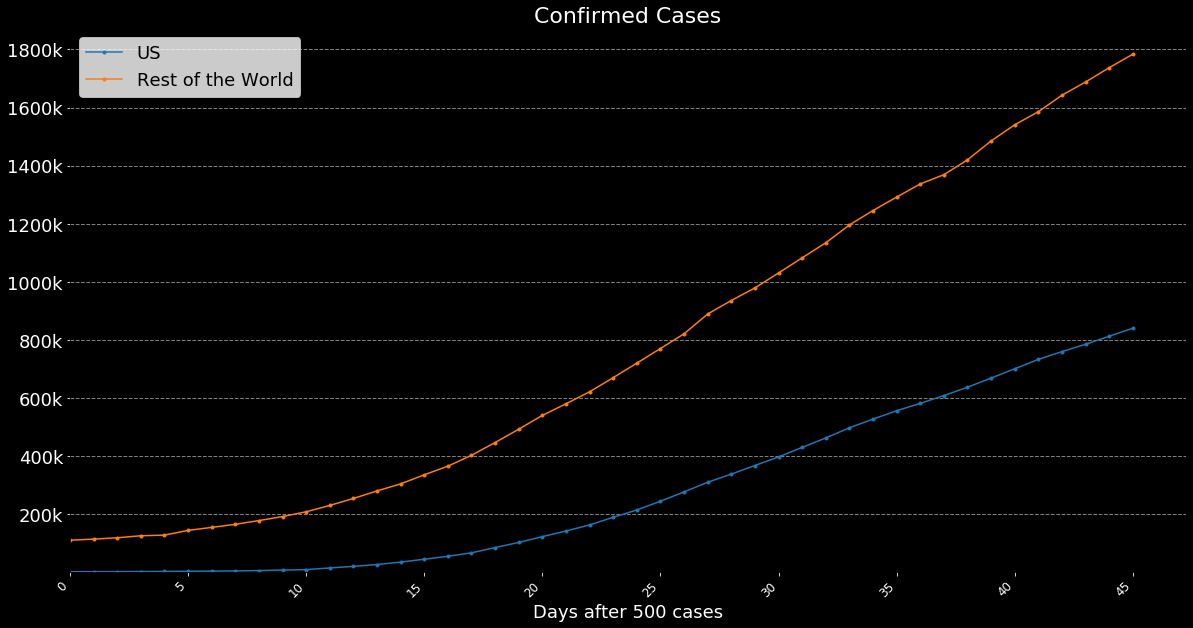

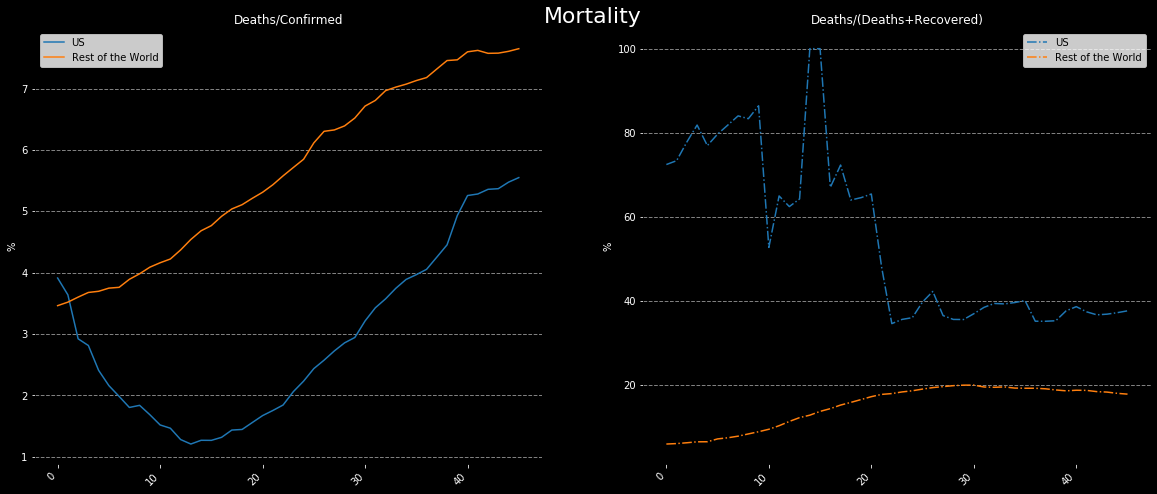

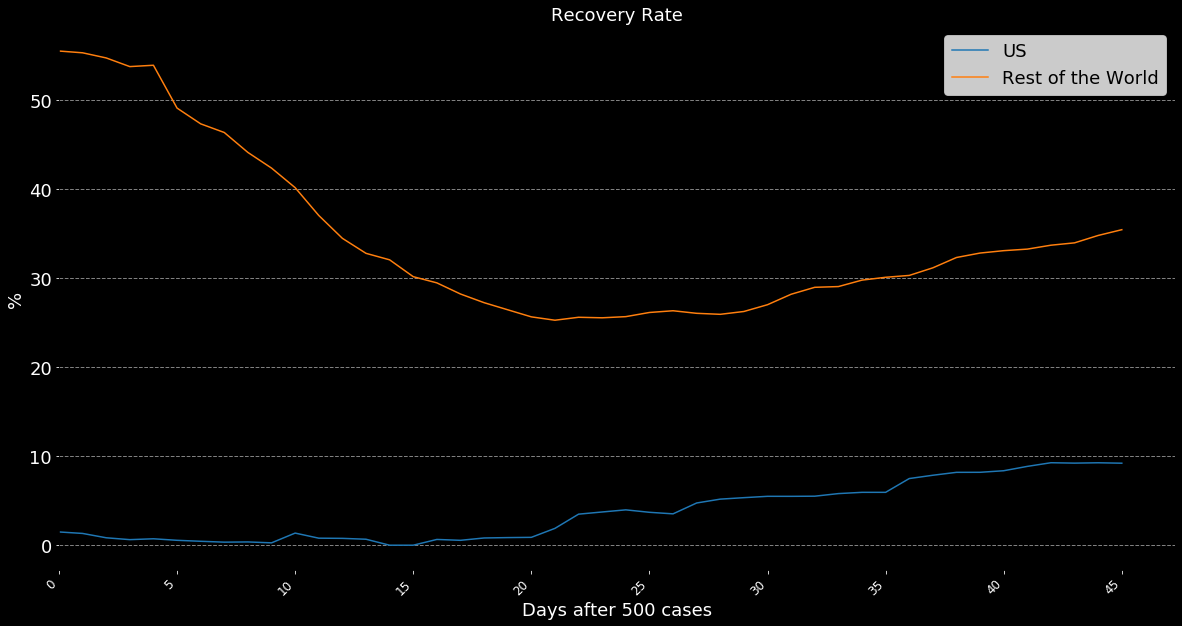

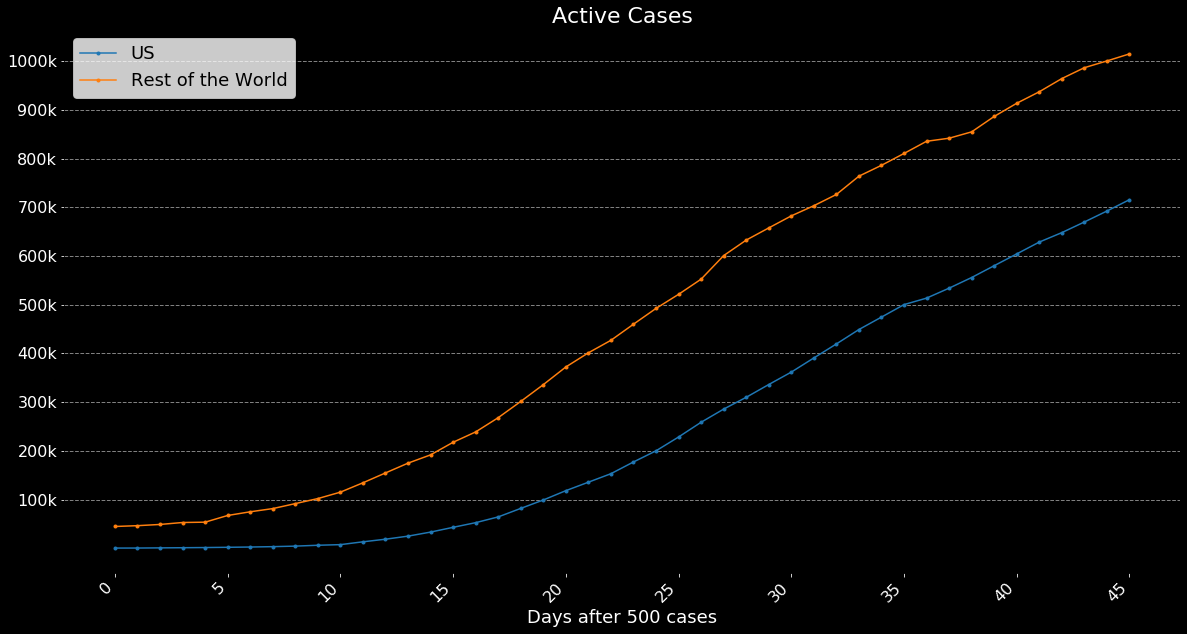

In [33]:
# US hit 500 on 03-08-2020
# Italy hit 500 on 02-27-2020
# Spain hit 500 on 03-07-2020
# Germany hit 500 on 03-06-2020

# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

# plot
plot_contry(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)

# yticks
yticks = np.arange(200000, 1800001, 200000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=18)

# details
plt.xlim(0,)
plt.ylim(0,)
plt.legend(['US', 'Rest of the World'], fontsize=18)

plt.savefig('img/conf_us.png', facecolor='black', edgecolor='none')
#plt.show()
# Mortality

fig, ax = plt.subplots(1, figsize=(20,8), facecolor='black')
plt.title('Mortality', color='white', fontsize=22)
ax.axis('off')

# Mortality method one
ax = fig.add_subplot(121)
plot_contry_d(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_d(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
plt.legend(['US', 'Rest of the World'])

# Mortality method two
ax = fig.add_subplot(122)
plot_contry_d_two(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_d_two(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
plt.legend(['US', 'Rest of the World'])
plt.savefig('img/mort_us.png', facecolor='black', edgecolor='none')
#plt.show()

# Recovery
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_r(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
plt.xlim(0,)

plt.legend(['US', 'Rest of the World'], fontsize=18)
plt.savefig('img/rec_us.png', facecolor='black', edgecolor='none')
#plt.show()

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_a(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
yticks = np.arange(100000, 1000001, 100000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['US', 'Rest of the World'], fontsize=18)

plt.savefig('img/active_us.png', facecolor='black', edgecolor='none')
#plt.show()

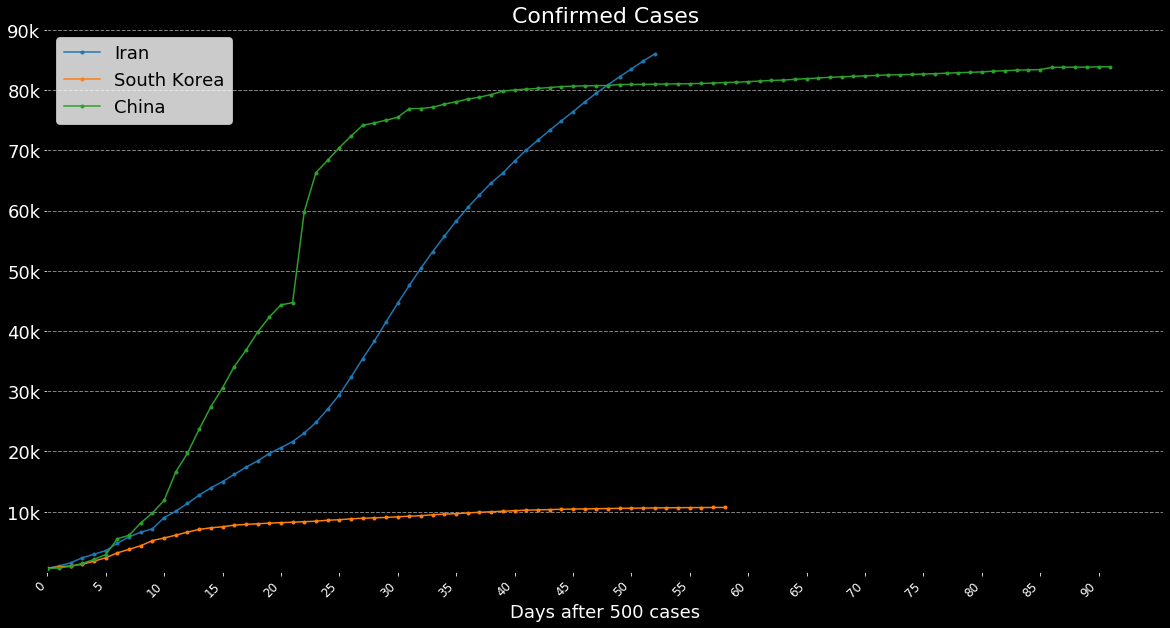

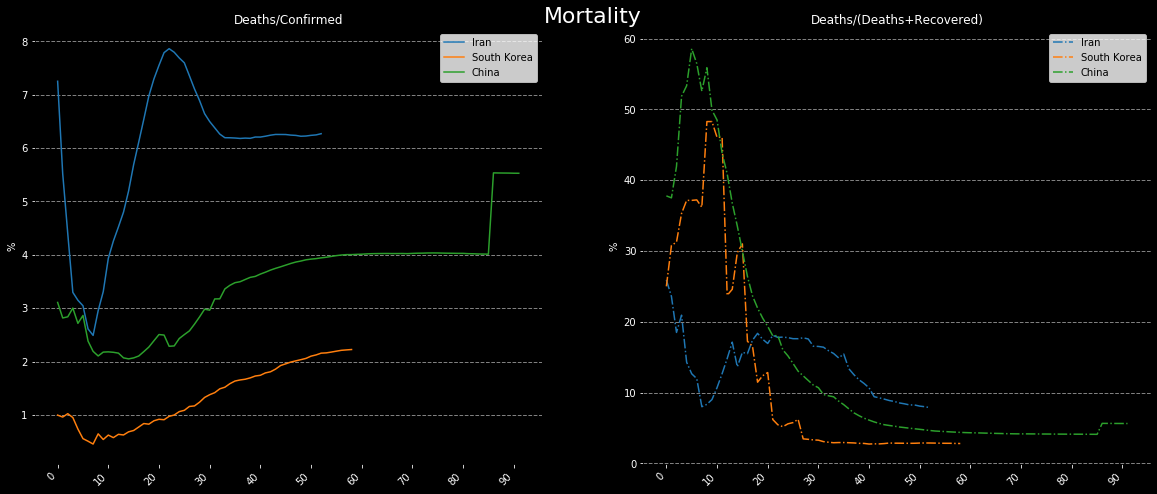

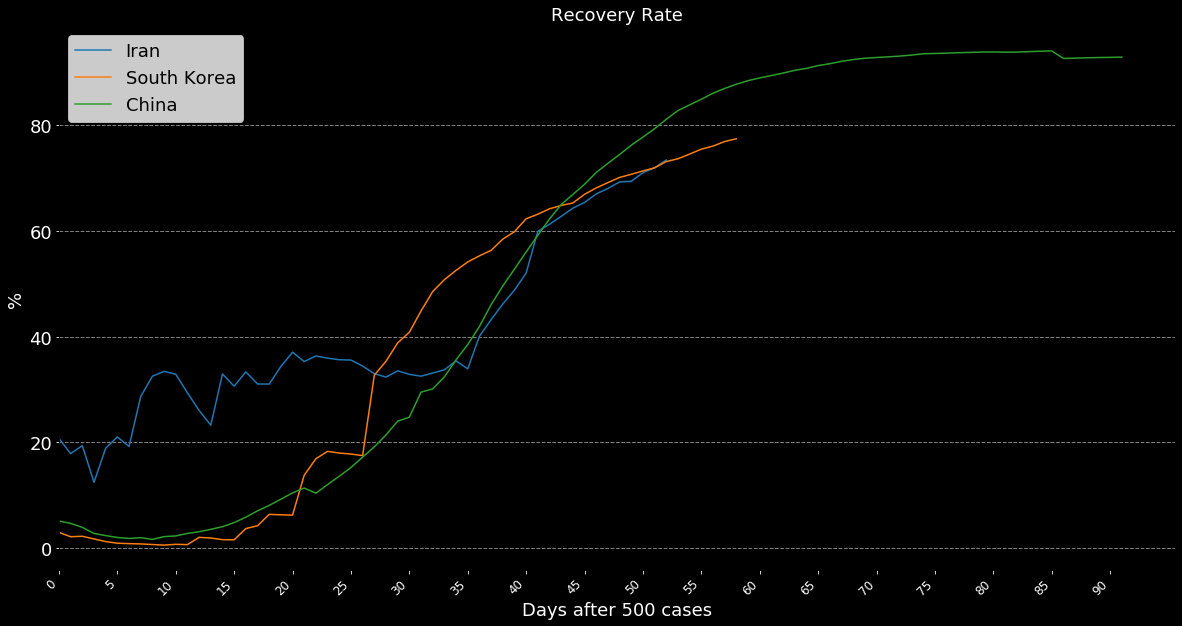

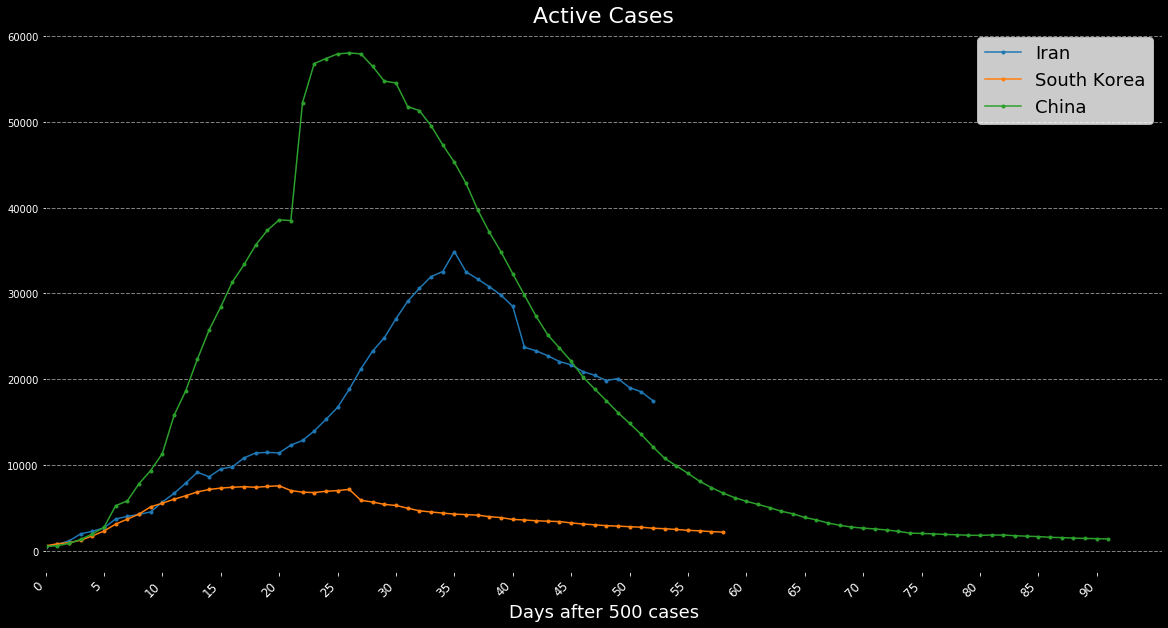

In [34]:
# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry(ax, ['China', 'Mainland China'])

yticks = np.arange(10000, 90001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=18)

plt.xlim(0,)
plt.ylim(0,)
plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/conf_china.png', facecolor='black', edgecolor='none')

# Mortality

fig, ax = plt.subplots(1, figsize=(20,8), facecolor='black')
plt.title('Mortality', color='white', fontsize=22)
ax.axis('off')

ax = fig.add_subplot(121)
plot_contry_d(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_d(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_d(ax, ['China', 'Mainland China'], inverse=False)

plt.legend(['Iran', 'South Korea', 'China'])

# Mortality Two

ax = fig.add_subplot(122)
plot_contry_d_two(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_d_two(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_d_two(ax, ['China', 'Mainland China'], inverse=False)

plt.legend(['Iran', 'South Korea', 'China'])
plt.savefig('img/mort_china.png', facecolor='black', edgecolor='none')

# Recovery

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_r(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_r(ax, ['China', 'Mainland China'], inverse=False)

plt.xlim(0,)

plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/rec_china.png', facecolor='black', edgecolor='none')

# Active

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_a(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_a(ax, ['China', 'Mainland China'], inverse=False)

plt.xlim(0,)

plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/active_china.png', facecolor='black', edgecolor='none')

In [ ]:
# US hit 500 on 03-08-2020
# Italy hit 500 on 02-27-2020
# Spain hit 500 on 03-07-2020
# Germany hit 500 on 03-06-2020

# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

# plot
#plot_contry(['US'], '03-08-2020', '03-09-2020')
plot_contry(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['Italy'], '02-27-2020', '02-28-2020')

# yticks
yticks = np.arange(25000, 200001, 25000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=18)

# details
plt.xlim(0,)
plt.ylim(0,)
plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)

plt.savefig('img/conf_top.png', facecolor='black', edgecolor='none')

# Mortality

fig, ax = plt.subplots(1, figsize=(20,8), facecolor='black')
plt.title('Mortality', color='white', fontsize=22)
ax.axis('off')

# Mortality method one
ax = fig.add_subplot(121)
#plot_contry_d(['US'], '03-08-2020', '03-09-2020')
plot_contry_d(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_d(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_d(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_d(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_d(ax, ['Italy'], '02-27-2020', '02-28-2020')

plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'])

# Mortality method two
ax = fig.add_subplot(122)
#plot_contry_d_two(['US'], '03-08-2020', '03-09-2020')
plot_contry_d_two(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_d_two(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_d_two(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_d_two(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_d_two(ax, ['Italy'], '02-27-2020', '02-28-2020')

plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'])
plt.savefig('img/mort_top.png', facecolor='black', edgecolor='none')

# Recovery
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

#plot_contry_r(['US'], '03-08-2020', '03-09-2020')
plot_contry_r(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_r(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['Italy'], '02-27-2020', '02-28-2020')

plt.xlim(0,)

plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)
plt.savefig('img/rec_top.png', facecolor='black', edgecolor='none')

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

#plot_contry_a(['US'], '03-08-2020', '03-09-2020')
plot_contry_a(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_a(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['Italy'], '02-27-2020', '02-28-2020')

yticks = np.arange(10000, 120001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)

plt.savefig('img/active_top.png', facecolor='black', edgecolor='none')

In [ ]:
# SK hit 500 on 2/23/20 
# Brazil hit 500 on 3/19/20
# Canada hit 500 on 03-18-2020

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry(ax, ['Canada'], '03-18-2020', '03-19-2020')

plt.xlim(0,)
plt.ylim(0,)

yticks = np.arange(5000, 45001, 5000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=18)
plt.legend(['Brazil', 'Canada'], fontsize=18)
plt.savefig('img/conf_selection.png', facecolor='black', edgecolor='none')

# Mortality
fig, ax = plt.subplots(1, figsize=(20,8), facecolor='black')
plt.title('Mortality', color='white', fontsize=22)
ax.axis('off')

ax = fig.add_subplot(121)
plot_contry_d(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_d(ax, ['Canada'], '03-18-2020', '03-19-2020')

plt.legend(['Brazil', 'Canada'])

# Mortality method two
ax = fig.add_subplot(122)
plot_contry_d_two(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_d_two(ax, ['Canada'], '03-18-2020', '03-19-2020')

plt.legend(['Brazil', 'Canada'])
plt.savefig('img/mort_selection.png', facecolor='black', edgecolor='none')

# Recovery Rate
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_r(ax, ['Canada'], '03-18-2020', '03-19-2020')
plt.xlim(0,)

plt.legend(['Brazil', 'Canada'], fontsize=18)
plt.savefig('img/rec_selection.png', facecolor='black', edgecolor='none')

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax,['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_a(ax,['Canada'], '03-18-2020', '03-19-2020')

yticks = np.arange(2000, 24001, 2000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['Brazil', 'Canada'], fontsize=18, loc = "upper left")

plt.savefig('img/active_selection.png', facecolor='black', edgecolor='none')

In [ ]:
name = ['Taiwan', 'Taiwan*']
df = get_range()
country = df[df['Country'].isin(name)]
country.head()

# Timelines

ITALY:

Jan. 31: Italy suspends flights to China and declares a national emergency after two cases are confirmed in Rome (2 confirmed cases).  

Feb. 20: A man in Lombardy tests positive after previously leaving the hospital without a test. He is believed to have spread the disease widely before developing severe symptoms (3 cases).  

Feb. 23: Small towns hit by the outbreak are placed under quarantine. Carnival celebrations and some soccer matches are canceled (150 cases).  

March 4: Schools and universities are closed (3,089 cases).  

March 8: Several northern provinces are placed under lockdown (7,375 cases).  

March 9: The lockdown is extended nationwide (9,172 cases).  

March 11: All restaurants and bars are closed (12,462 cases).  

March 22: Factories are closed and all nonessential production is halted (59,138 cases).

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')
plot_contry(ax, ['Italy'], '02-19-2020', '02-20-2020')

events_x = [5, 14, 18, 19, 21, 32]
events_y = [150, 3000, 7300, 9150, 12450, 59120]
arrow_size = [10000, 10000, 12000, 25000, 35000, 15000]

texts = ['Lombardi Outbreak', 'Schools Closed', 'Northern Provinces\nLockdown', 'Nationwide Lockdown', 
         'All Restaurants and Bars Closed', 'All Nonessential Production Halted']

for i in np.arange(6):
    plt.arrow(events_x[i], events_y[i], 0, arrow_size[i], length_includes_head=True,
              head_width=0.5, head_length=2000, color='white')
    
    plt.text(events_x[i], arrow_size[i]+events_y[i]+1500, texts[i], color='white', ha='right', fontsize=14)
    
plt.legend(['Italy'], loc='upper left')
plt.xlabel('Days Since Jan-22')
plt.savefig('img/italy_timeline.png', facecolor='black', edgecolor='none')

In [ ]:
# took the data from a blog and reviewed it with other sources likes news articles and government annoucements
#January 24, 2020: Testing is Made Available
#January 30, 2020: New Testing Method is Made Available
#February 07, 2020: Testing Criteria Reduced\n(Anyone with Symptons to be tested) 
#February 18, 2020: Expansion of testing availability
#February 26, 2020: Expansion of testing (Drive-through)
#March 23, 2020: Expansion of testing(Walk-through in airports)

In [ ]:
#'01-22-2020'
# Data from multiple sources, mostly from Kaggle covid19 measures dataset
events_x = [2, 8, 15, 26, 34, 50]
events_y = [0, 0, 0, 0, 1000, 8000]
arrow_size = [1000, 2000, 3000, 3800, 3800, 1000]
texts = ['Testing is\nMade Available', 'New Testing Method\nis Made Available',
'Testing Criteria Reduced', 'Expansion of testing availability', 
'Expansion of testing (Drive-through)', 'Expansion of testing (Walk-through in airports)']


fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')
plot_contry(ax, ['South Korea', 'Korea, South'])

for i in np.arange(6):
    plt.arrow(events_x[i], events_y[i], 0, arrow_size[i], length_includes_head=True,
              head_width=0.5, head_length=100, color='white')
    
    plt.text(events_x[i], arrow_size[i]+events_y[i], texts[i], color='white', ha='right', fontsize=14)
    
plt.legend(['South Korea'], loc='upper left')
plt.xlabel('Days Since Jan-22')
plt.savefig('img/sk_timeline.png', facecolor='black', edgecolor='none')

In [ ]:
# Source: 
# https://www.businessinsider.com/countries-on-lockdown-coronavirus-italy-2020-3

events_x = [1, 48, 49, 50, 51, 52, 53, 54, 55, 57, 
            58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
            68, 69, 70, 71, 72, 74]

events_y = [1, 114000, 120000, 126000, 140000, 152000, 162000, 185000,
            200000, 240000, 265000, 300000, 330000, 380000, 415000, 460000,
            533000, 600000, 663000, 715000, 785000, 850000, 925000, 1005000,
            1100000, 1275000]

arrow_size = [30000, -90000, 50000, -62000, 170000, -45000, 260000,
              350000, -50000, -50000, -30000, 440000, -40000, 490000, 
              560000, 690000, -50000, -50000, -50000, -50000, -50000, 
              500000, 600000, -80000, -50000, -60000,]

texts = ['China', 
 'Italy', 
 'Denmark\nEl Salvador',
 'Norway', 
 'Kuwait\nPoland',
 'Spain',
 'Kenya\nMorocco',
 'EU - Non-essential Travel Ban\nMalasya\nFrance\nCzech Republic',
 'Belgium',
 'Israel',
 'Germany',
 'Jordan\nArgentina',
 'Belgium - Extended',
 'UK\nAustralia',
 'Norway - Extended\nColombia\nIndia',
 'Saudi Arabia\nIsrael - Extended\nNew Zealand\nMalasya',
 'South Africa\nUnited Arab Emirates - Curfew',
 'Ireland',
 'Hungary',
 'Saudi Arabia - Extended',
 'Russia',
 'Australia - Extended\nIsrael - Extended\nSingapore',
 'Spain\nPanama\nGermany',
 'Peru\nThailand - Curfew',
 'UAE',
 'Saudi Arabia - Extended\nKuwait - Extended'
]


fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')
plot_contry(ax, [''], inverse = True)
plt.ylim(0,1600000)
for i in np.arange(len(events_x)):
    plt.arrow(events_x[i], events_y[i], 0, arrow_size[i], length_includes_head=True,
              head_width=0.5, head_length=10000, color='white')
    
    ha = 'right'
    va='bottom'
    adjust = arrow_size[i]
    if (arrow_size[i] < 0): 
        ha = 'left'
        va = 'top'
    
    plt.text(events_x[i], adjust+events_y[i], texts[i], color='white', ha=ha, va=va, fontsize=14)
    
plt.legend(['Confirmed Cases'], loc='upper left')
plt.title('World Lockdown Timeline')
plt.xlabel('Days Since Jan-22')
plt.savefig('img/world_timeline.png', facecolor='black', edgecolor='none')

In [ ]:
def build_pie(name = ''):

    df_pie = build_df(file)

    if name != '':
        if type(name) != str:
            df_pie = df_pie[df_pie['Country'].isin(name)]
            name = name[0]
        else:
            df_pie = df_pie[df_pie['Country'].isin([name])]

    s = df_pie.sum()
    r = s['Recovered'] / s['Confirmed']
    d = s['Deaths'] / s['Confirmed']
    a = s['Active'] / s['Confirmed']

    size_of_groups=[r,d,a]
    names = ['{:,d}'.format(int(r*100))+'%', '{:,d}'.format(int(d*100))+'%', '{:,d}'.format(int(a*100))+'%']
    # Create a pieplot
    plt.pie(size_of_groups, colors= ['lightblue', 'darkgrey', 'orangered'],
            labels=names, labeldistance=1.07, 
            textprops={'fontsize': 22, 'color':'white'})

    # add a circle at the center
    my_circle=plt.Circle( (0,0), 0.7, color='black')
    #p=plt.gcf()
    fig.gca().add_artist(my_circle)

    if name == '': 
        name = 'World'

    plt.text(0, 0,
             name+'\n'+'{:,d}'.format(int(s['Confirmed']))+' Cases', 
             color='white', ha='center', va='center', fontsize=22)
    
    ax.set_facecolor('xkcd:black')

In [ ]:
df_pie = build_df(file)

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,9), facecolor='black')
build_pie()
# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(0., -0.05, 1., -.102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend
plt.savefig('img/world_pie.png', facecolor='black', edgecolor='none')

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

ax1 = fig.add_subplot(121, facecolor='black')
build_pie('Canada')

ax = fig.add_subplot(122, facecolor='black')
build_pie('Brazil')

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

plt.savefig('img/selection_pie.png', facecolor='black', edgecolor='none')

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,16), facecolor='black')

ax1 = fig.add_subplot(221, facecolor='black')
build_pie('US')

ax = fig.add_subplot(222, facecolor='black')
build_pie('Spain')

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

ax = fig.add_subplot(223, facecolor='black')
build_pie('Italy')

ax = fig.add_subplot(224, facecolor='black')
build_pie('France')

plt.savefig('img/top_pie.png', facecolor='black', edgecolor='none')

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,16), facecolor='black')
#plt.title('Recoveries and Deaths', color='white', fontsize=28)

ax1 = fig.add_subplot(221, facecolor='black')
build_pie(['China', 'Mainland China'])

ax = fig.add_subplot(222, facecolor='black')
build_pie(['South Korea', 'Korea, South'])

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

ax = fig.add_subplot(223, facecolor='black')
build_pie('Germany')

ax = fig.add_subplot(224, facecolor='black')
build_pie(['Taiwan', 'Taiwan*'])

plt.savefig('img/rec_pie.png', facecolor='black', edgecolor='none')

In [ ]:
slope_df = build_df(file)
slope_df['r'] = slope_df['Recovered'] / slope_df['Confirmed'] * 100
slope_df['a'] = slope_df['Active'] / slope_df['Confirmed'] * 100
slope_df = slope_df.sort_values('Confirmed')[-5:]

countries = slope_df.Country.unique().tolist()
fig, ax = plt.subplots(1, figsize=(8,8), facecolor='black')

for name in countries:
    color = 'orangered'
    c_df = slope_df[slope_df['Country'] == name]
    
    if c_df['a'].values[0] < c_df['r'].values[0]:
        color='lightgreen'
        
    i = slope_df[slope_df['Country'] == name][['a', 'r']]

    plt.plot([1, 2], i.values[0], marker='o', color=color)
    plt.text(0.97, i.values[0][0], name, ha='right', color='white')
    
plt.text(1, 101, 'Active', ha='center', fontsize=16, color='white')
plt.text(2, 101, 'Recovered', ha='center', fontsize=16, color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Colors, labels, ticks
ax.set_facecolor('xkcd:black')
plt.xticks([])
plt.yticks(color='white')
plt.ylabel('%', color='white')
plt.ylim(-0.5,100)
plt.xlim(0.8, 2.2)

plt.show()